Its not recommended practice to add image in PPTX plot 

all plot should be done using native PPTX API

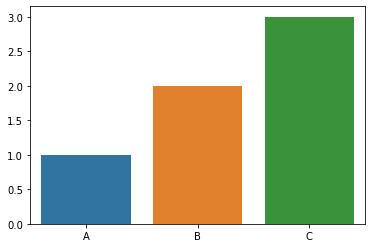

In [7]:
from pptx import Presentation
from pptx.util import Inches
from pptx.enum.text import PP_ALIGN
from pptx.enum.shapes import MSO_SHAPE
from pptx.dml.color import RGBColor
from pptx.chart.data import CategoryChartData
import seaborn as sns
import io

# Create a new PowerPoint presentation
prs = Presentation()

# Create a new slide with title and subtitle
title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]
title.text = "Seaborn and PowerPoint"
subtitle.text = "A Beautiful Partnership"

# Create a new slide with a seaborn plot
plot_slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(plot_slide_layout)

# Generate a seaborn plot
plot = sns.barplot(x=["A", "B", "C"], y=[1, 2, 3])
fig = plot.get_figure()
image_stream = io.BytesIO()
fig.savefig(image_stream)

# Add the plot to the PowerPoint slide
plot = slide.shapes.add_picture(image_stream, left=Inches(0.5), top=Inches(1.5))

# Add a title and description to the slide
title = slide.shapes.add_textbox(left=Inches(0.5), top=Inches(0.25), width=Inches(9), height=Inches(0.5))
title.text = "Seaborn Plot Example"
title.text_frame.paragraphs[0].font.bold = True
title.text_frame.paragraphs[0].font.size = Inches(0.4)
title.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)
title.text_frame.paragraphs[0].alignment = PP_ALIGN.LEFT

description = slide.shapes.add_textbox(left=Inches(0.5), top=Inches(2.5), width=Inches(9), height=Inches(0.5))
description.text = "This is an example of a Seaborn plot added to a PowerPoint slide using the pptx package in Python. The plot shows the values of A, B, and C."
description.text_frame.paragraphs[0].font.size = Inches(0.3)
description.text_frame.paragraphs[0].font.color.rgb = RGBColor(150, 150, 150)
description.text_frame.paragraphs[0].alignment = PP_ALIGN.LEFT

# Add a chart to the slide
chart_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(chart_slide_layout)

# Add a title to the slide
title = slide.shapes.add_textbox(left=Inches(0.5), top=Inches(0.25), width=Inches(9), height=Inches(0.5))
title.text = "Chart Example"
title.text_frame.paragraphs[0].font.bold = True
title.text_frame.paragraphs[0].font.size = Inches(0.4)
title.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)
title.text_frame.paragraphs[0].alignment = PP_ALIGN.LEFT

# Add a description to the slide
description = slide.shapes.add_textbox(left=Inches(0.5), top=Inches(1), width=Inches(9), height=Inches(0.5))
description.text = "This is an example"

prs.save('Report1.pptx')